## softmax 문제
- softmax가 없어도 학습 가능
- 아주 드문 경우 문제 생김 -> 확률값으로 바뀌면서 값이 잘려 다르게 나옴(numerical stability)
- 그래프로 성능 체크해봐야됨.

In [3]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [8]:
train_images = train_images.reshape((50000, 32, 32, 3))
test_images = test_images.reshape((10000, 32, 32, 3))

train_images, test_images = train_images / 255.0, test_images / 255.0

In [23]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [24]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

# softmax 없음
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)               

In [25]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
1563/1563 [==============================] - 24s 16ms/step - loss: 2.4262 - accuracy: 0.1007
Epoch 2/3
1563/1563 [==============================] - 25s 16ms/step - loss: 2.3026 - accuracy: 0.1000
Epoch 3/3
1563/1563 [==============================] - 25s 16ms/step - loss: 2.3026 - accuracy: 0.1000


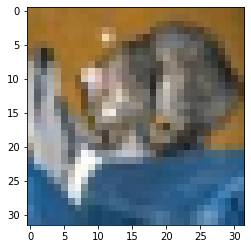

In [26]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(test_images[0])

In [27]:
t = model.predict(test_images[0][tf.newaxis])
t

array([[-0.66455734, -0.41640148, -1.0381657 , -0.26419407, -0.25359637,
        -0.4989183 , -0.44707978, -0.04233132, -0.59772396, -0.5510025 ]],
      dtype=float32)

In [28]:
np.argmax(t)

7

In [35]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_6 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)               

## logit

- 딥러닝에서 softmax 이전 단계를 logits이라고 함

- softmax 안쓰고 from_logits=True 
    - SparseCategoricalCrossentropy(from_logits=False)
    
https://www.tensorflow.org/tutorials/images/cnn  -> 영어 버전 보기

In [31]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=3,
          validation_data=(test_images, test_labels))

Epoch 1/3
1563/1563 [==============================] - 28s 18ms/step - loss: 1.5464 - accuracy: 0.4346 - val_loss: 1.2483 - val_accuracy: 0.5478
Epoch 2/3
1563/1563 [==============================] - 27s 17ms/step - loss: 1.1805 - accuracy: 0.5822 - val_loss: 1.1239 - val_accuracy: 0.6026
Epoch 3/3
1563/1563 [==============================] - 27s 17ms/step - loss: 1.0247 - accuracy: 0.6402 - val_loss: 1.0164 - val_accuracy: 0.6375


In [32]:
t = model.predict(test_images[0][tf.newaxis])
t
# 값이 합해서 1은 아니지만 결과는 잘 나옴.

array([[-0.15852107, -3.4590712 , -1.213339  ,  2.58521   , -3.3613186 ,
         0.12819362, -1.0627309 , -2.8277793 ,  1.4405435 , -2.0089605 ]],
      dtype=float32)

In [33]:
np.argmax(t)

3

softmax있고 from_logits=True

In [36]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=3,
          validation_data=(test_images, test_labels))

Epoch 1/3
1563/1563 [==============================] - 30s 19ms/step - loss: 2.1005 - accuracy: 0.3502 - val_loss: 2.0167 - val_accuracy: 0.4417
Epoch 2/3
1563/1563 [==============================] - 28s 18ms/step - loss: 1.9871 - accuracy: 0.4707 - val_loss: 1.9809 - val_accuracy: 0.4745
Epoch 3/3
1563/1563 [==============================] - 27s 17ms/step - loss: 1.9446 - accuracy: 0.5136 - val_loss: 1.9255 - val_accuracy: 0.5319


In [37]:
t = model.predict(test_images[0][tf.newaxis])
t

array([[8.0428357e-08, 9.3020708e-10, 2.9348840e-03, 9.9541795e-01,
        8.8985965e-09, 1.6127977e-03, 1.8518071e-05, 2.8206441e-14,
        1.5782140e-05, 2.5528786e-08]], dtype=float32)

In [ ]:
np.argmax(t)

### logit을 붙여야 하는 이유
- numerically stable : 문제가 일어날 수 있는 경우를 줄여줌
- softmax에서 값이 아주 작게 나올 때 문제가 생길 수 있음.
- default아닌 이유 -> 경우가 드뭄.
- 그렇지만 속도가 더 느리고 이런 경우가 많이 없다.
- 실무 tech임!

</br>

**softmax는 또한 입력값에 따라서 overflow일어남**
    -> 그래프를 그려봐야 암

softmax 구현

In [38]:
def softmax(x):
    return np.exp(x)/np.sum(np.exp(x))
softmax([1,2,3])

array([0.09003057, 0.24472847, 0.66524096])

In [39]:
s = softmax([1000,2000,3000])
s  # overflow -> 입력값의 문제

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


array([nan, nan, nan])

In [41]:
def softmax2(x):
    c = np.max(x)
    exp_c = np.exp(x-c)
    s_exp_c = np.sum(exp_c)
    return exp_c / s_exp_c
softmax2([1000,2000,3000])

array([0., 0., 1.])

CNN

- 위치에 상관없이 잘 맞는다.(translation invariance)
- 요새는 pooling 대신 stride?
- equal

-> data augmentation 해야 됨!

</br>

### tensorflow.keras.preprocessing.image
- PIL 기반
- invariance하게 만들기 위해서 필요한 기능 제공

</br>

## data augmentation

- zoom : invariant하게 만들기 위함.


flower data


https://www.tensorflow.org/tutorials/images/classification

In [42]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# 이미지 바꾸기

In [2]:
from tensorflow.keras.utils import to_categorical, get_file, plot_model
# util 알아야 할 것
# getfile : 인터넷에서 파일 가져오기, keras 안에 저장되어 2번 실행되면 cache에서 가져옴

directory

## pathlib
- 데이터 구축이 제일 중요하고 어려움
    - Library Reference > File and Directory Access 
        - `pathlib`에서 다양한 기능 제공하지만 glob 정규식 이용해서 패턴 찾음
- 데이터 양이 많으면 수동으로 하기 힘들다



100만개 -> dataframe(전처리 + eda)


|위치|클래스|시간|
|-|-|-|
|direct|폴더별|time|




In [7]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url, 
                                   fname='flower_photos', 
                                   untar=True)
data_dir = pathlib.Path(data_dir)

In [8]:
data_dir

WindowsPath('C:/Users/Gyu/.keras/datasets/flower_photos')

In [9]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('C:/Users/Gyu/.keras/datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('C:/Users/Gyu/.keras/datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('C:/Users/Gyu/.keras/datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('C:/Users/Gyu/.keras/datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('C:/Users/Gyu/.keras/datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [10]:
list(data_dir.glob('daisy/*.jpg'))[:5]

[WindowsPath('C:/Users/Gyu/.keras/datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('C:/Users/Gyu/.keras/datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('C:/Users/Gyu/.keras/datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('C:/Users/Gyu/.keras/datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('C:/Users/Gyu/.keras/datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [11]:
len(list(data_dir.glob('*/*.jpg')))

3670

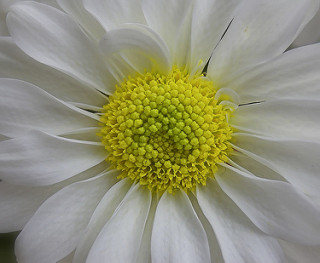

In [12]:
from PIL import Image
x = list(data_dir.glob('*/*.jpg'))
Image.open(x[0])
# 예시에선 str 안해도 됨(duck typing)
# size 가 다 다른거 같음.

In [13]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
# directory에서 이미지 데이터 세트를 만들기

directory에서 dataset만들기
- 파이프라인 기능
- tf.data : low level로 구축(directory, dataframe)
    - 간단하고 재사용 가능한 조각으로 입력
- 파이프라인 build

In [14]:
train_data = image_dataset_from_directory(data_dir, image_size=(180,180))

Found 3670 files belonging to 5 classes.


In [15]:
dat = iter(train_data)

In [16]:
a, b = next(dat) # 데이터 나누기?

In [17]:
a.shape

TensorShape([32, 180, 180, 3])

In [23]:
for i ,j in train_data:
    print(i)
    print('-------')
    print(j)
    break
    
# PIL로 다 보기 어려워 모든 데이터를 tensor형태로 바꾸기

- 전처리 layer(tf.keras.layers.experimental.preprocessing)
    - Resizing layer : 
    - Rescaling layer : 정규화
    - CenterCrop layer

-> 함수처럼 사용가능(functional api)

In [18]:
t = tf.keras.layers.experimental.preprocessing.Rescaling(1/256)

In [19]:
train_data.map(lambda x,y:(t(x),y)) # scaling적용

<MapDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>

In [20]:
a = train_data.map(lambda x,y:(t(x),y))
issubclass(type(a),tf.data.Dataset) # 학습 데이터 구성 가능

True

In [21]:
a

<MapDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>